In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pd
import xlsxwriter 
import os

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


Ref=pd.read_excel(r'E:\PWT\numpyref.xlsx')
source = "G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Resampled"
dir_list = os.listdir(source)
os.chdir(source)
dir_list.sort()
workbook = xlsxwriter.Workbook('Test_data_seat.xlsx') 
row=0
bold = workbook.add_format({'bold': True})
for j in range(1):
    #worksheet = workbook.add_worksheet(Ref.OUTPUT[j]) 
    filename = dir_list[j]
    Metal=pd.read_excel(filename,'Seat_Metal',header=0,names=None,index_col=0)
    Favourite=pd.read_excel(filename,'Seat_Favourite',header=0,names=None,index_col=0)
    os.chdir('G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Plots')
    Dir=Ref.TITLE_SHEET[j]
    os.mkdir(Dir)
    os.chdir(Dir)
    param_full=Metal.columns.values
    for i in range(1,16):
        if workbook.get_worksheet_by_name(param_full[i]):
            worksheet=workbook.get_worksheet_by_name(param_full[i])
        else:
            worksheet = workbook.add_worksheet(param_full[i])
            row=0
            worksheet.write(row,0,'Participant',bold)
            worksheet.write(row,1,'MPF_Metal',bold)
            worksheet.write(row,2,'MPF_Favourite',bold)
            worksheet.write(row,3,'(MPF_Favourite-MPF_Metal)',bold)
            worksheet.write(row,4,'Area_Metal',bold)
            worksheet.write(row,5,'Area_Favourite',bold)
            worksheet.write(row,6,'Max_Power_Metal',bold)
            worksheet.write(row,7,'Dom_Freq_Metal',bold)
            worksheet.write(row,8,'Max_Power_Favourite',bold)
            worksheet.write(row,9,'Dom_Freq_Favourite',bold)
            row+=1
        param=param_full[i]
        low_cutoff=1
        high_cutoff=20
        freq=100
        order=4
        PSD=plt.figure()
        Metal_PSD=plt.psd(butter_bandpass_filter(Metal[param], low_cutoff,high_cutoff, freq, order), Fs=100)
        Favourite_PSD=plt.psd(butter_bandpass_filter(Favourite[param],low_cutoff,high_cutoff, freq, order), Fs=100)
        PSD.legend(['Metal','Favourite'])
        PSD.suptitle(param)
        PSD.savefig(Ref.TITLE_SHEET[j]+'_'+param+'.png')
        MPF_Metal=np.linalg.norm(np.multiply(Metal_PSD[0],Metal_PSD[1]),1)/np.linalg.norm(Metal_PSD[0],1)
        MPF_Favourite=np.linalg.norm(np.multiply(Favourite_PSD[0],Favourite_PSD[1]),1)/np.linalg.norm(Favourite_PSD[0],1)
        worksheet.write(row,0,Ref.OUTPUT[j])
        worksheet.write(row,1,MPF_Metal)
        worksheet.write(row,2,MPF_Favourite)
        worksheet.write(row,3,(MPF_Favourite-MPF_Metal))
        worksheet.write(row,4,np.linalg.norm(np.multiply(Metal_PSD[0],Metal_PSD[1]),1))
        worksheet.write(row,5,np.linalg.norm(np.multiply(Favourite_PSD[0],Favourite_PSD[1]),1))
        worksheet.write(row,6,Metal_PSD[0][np.argmax(Metal_PSD[0])])
        worksheet.write(row,7,Metal_PSD[1][np.argmax(Metal_PSD[0])])
        worksheet.write(row,8,Favourite_PSD[0][np.argmax(Favourite_PSD[0])])
        worksheet.write(row,9,Favourite_PSD[1][np.argmax(Favourite_PSD[0])])
        plt.clf()
    row=row+1
    plt.clf()
    os.chdir(source)
workbook.close() 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pd
import xlsxwriter 
import os

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


Ref=pd.read_excel(r'E:\PWT\numpyref.xlsx')
source = "G:\Shared drives\PWT - Research on Interventions in commute\Parsed Files\Resampled"
dir_list = os.listdir(source)
os.chdir(source)
dir_list.sort()
row=0

filename = 'B300.xlsx'
Metal=pd.read_excel(filename,'Seat_Metal',header=0,names=None,index_col=0)
Favourite=pd.read_excel(filename,'Seat_Favourite',header=0,names=None,index_col=0)

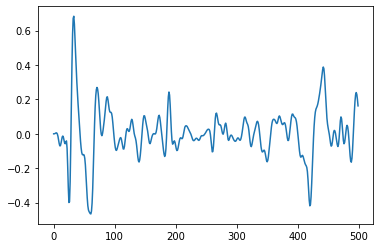

In [35]:
test=butter_bandpass_filter(Metal['gyrox'], low_cutoff,high_cutoff, freq, order)
plt.plot(test[:500])

In [66]:
Metal['gyrox'].size

70781

In [67]:
butter_bandpass_filter(Metal['gyrox'], low_cutoff,high_cutoff, freq, order).size

70781

(-40.1003433205151, 5.597059915858238)

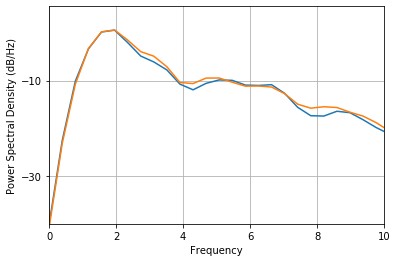

In [25]:
low_cutoff=1
high_cutoff=10
freq=100
order=4
Metal_PSD=plt.psd(butter_bandpass_filter(Metal['gyrox'], low_cutoff,high_cutoff, freq, order), Fs=100)
Favourite_PSD=plt.psd(butter_bandpass_filter(Favourite['gyrox'],low_cutoff,high_cutoff, freq, order), Fs=100)
plt.xlim((0,10))
plt.ylim(((np.amin(10*np.log10(Metal_PSD[0][:list(Metal_PSD[1]).index(10.15625)]))),(np.amax(10*np.log10(Metal_PSD[0][:list(Metal_PSD[1]).index(10.15625)]))+5)))

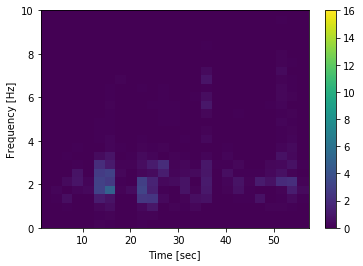

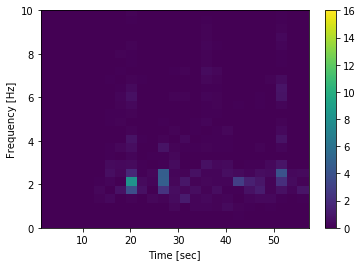

In [50]:
from scipy import signal
filename = 'B315.xlsx'
Metal1=pd.read_excel(filename,'Seat_Metal',header=0,names=None,index_col=0)
Favourite1=pd.read_excel(filename,'Seat_Favourite',header=0,names=None,index_col=0)
f,t,Sxx=signal.spectrogram(butter_bandpass_filter(Metal1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)
f1,t1,Sxx1=signal.spectrogram(butter_bandpass_filter(Favourite1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)


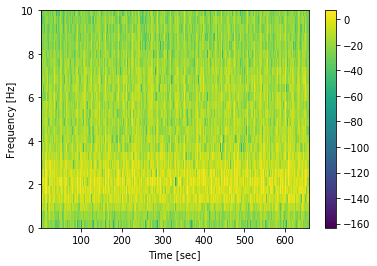

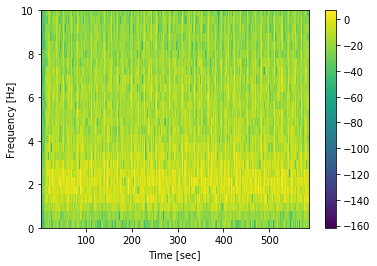

In [60]:
f,t,Sxx=signal.spectrogram(butter_bandpass_filter(Metal1['gyrox'], low_cutoff,high_cutoff, freq, order), fs=100)
f1,t1,Sxx1=signal.spectrogram(butter_bandpass_filter(Favourite1['gyrox'], low_cutoff,high_cutoff, freq, order), fs=100)
fig=plt.figure()
plt.pcolormesh(t, f, 10*np.log10(Sxx),vmax=10*np.log10(5))
#plt.pcolormesh(t1, f1, Sxx1)
plt.colorbar()
plt.ylim((0,10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
fig1=plt.figure()
#plt.pcolormesh(t, f, Sxx)
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1),vmax=10*np.log10(5))
plt.colorbar()
plt.ylim((0,10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

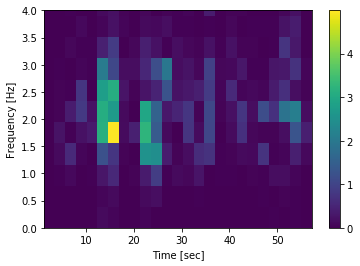

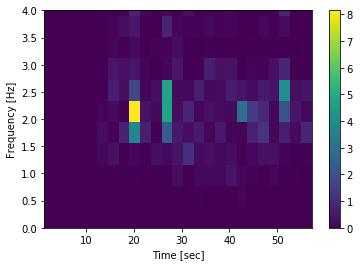

In [96]:
f,t,Sxx=signal.spectrogram(butter_bandpass_filter(Metal1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)
f1,t1,Sxx1=signal.spectrogram(butter_bandpass_filter(Favourite1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)
fig=plt.figure()
plt.pcolormesh(t, f, Sxx )
#plt.pcolormesh(t1, f1, Sxx1)
plt.colorbar()
plt.ylim((0,4))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
fig1=plt.figure()
#plt.pcolormesh(t, f, Sxx)
plt.pcolormesh(t1, f1, Sxx1)
plt.colorbar()
plt.ylim((0,4))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

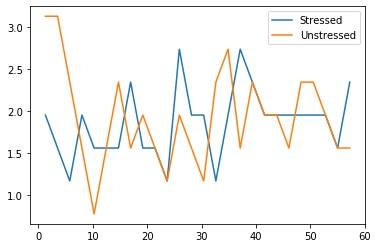

In [93]:
f_new=np.zeros(t.shape)
f1_new=np.zeros(t1.shape)
for i in range(t.size):
    f_new[i]=f[np.argmax(Sxx[:,i])]
for i in range(t1.size):
    f1_new[i]=f[np.argmax(Sxx1[:,i])]
fig=plt.figure()
plt.plot(t,f_new)
plt.plot(t1,f1_new)
plt.legend(('Stressed','Unstressed'))

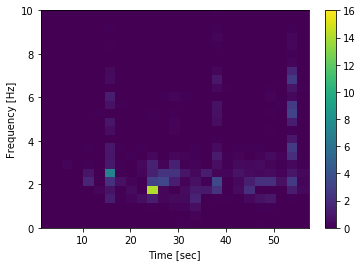

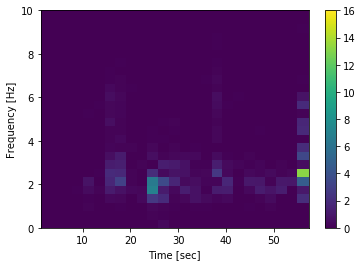

In [49]:
f,t,Sxx=signal.spectrogram(butter_bandpass_filter(Metal1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)
f1,t1,Sxx1=signal.spectrogram(butter_bandpass_filter(Favourite1['gyrox'][:6000], low_cutoff,high_cutoff, freq, order), fs=100)
fig=plt.figure()
plt.pcolormesh(t, f, Sxx ,vmax=16, vmin=0)
#plt.pcolormesh(t1, f1, Sxx1)
plt.colorbar()
plt.ylim((0,10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
fig1=plt.figure()
#plt.pcolormesh(t, f, Sxx)
plt.pcolormesh(t1, f1, Sxx1,vmax=16, vmin=0)
plt.colorbar()
plt.ylim((0,10))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

(0, 20)

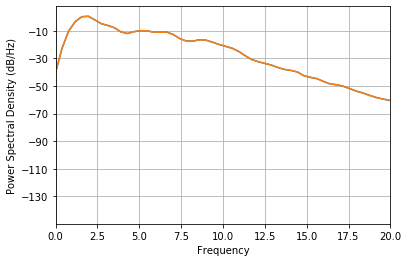

In [8]:
Metal_PSD=plt.psd(butter_bandpass_filter(Metal['gyrox'], low_cutoff,high_cutoff, freq, order), Fs=100)
plt.plot(Metal_PSD[1], 10*np.log10(Metal_PSD[0]))
plt.xlim((0,20))

In [21]:
list(Metal_PSD[1]).index(10.15625)

26

In [19]:
Metal_PSD[1]

array([ 0.      ,  0.390625,  0.78125 ,  1.171875,  1.5625  ,  1.953125,
        2.34375 ,  2.734375,  3.125   ,  3.515625,  3.90625 ,  4.296875,
        4.6875  ,  5.078125,  5.46875 ,  5.859375,  6.25    ,  6.640625,
        7.03125 ,  7.421875,  7.8125  ,  8.203125,  8.59375 ,  8.984375,
        9.375   ,  9.765625, 10.15625 , 10.546875, 10.9375  , 11.328125,
       11.71875 , 12.109375, 12.5     , 12.890625, 13.28125 , 13.671875,
       14.0625  , 14.453125, 14.84375 , 15.234375, 15.625   , 16.015625,
       16.40625 , 16.796875, 17.1875  , 17.578125, 17.96875 , 18.359375,
       18.75    , 19.140625, 19.53125 , 19.921875, 20.3125  , 20.703125,
       21.09375 , 21.484375, 21.875   , 22.265625, 22.65625 , 23.046875,
       23.4375  , 23.828125, 24.21875 , 24.609375, 25.      , 25.390625,
       25.78125 , 26.171875, 26.5625  , 26.953125, 27.34375 , 27.734375,
       28.125   , 28.515625, 28.90625 , 29.296875, 29.6875  , 30.078125,
       30.46875 , 30.859375, 31.25    , 31.640625, 

In [3]:
import numpy as np
f=[1,2,3,4,5]
t=[10,20,30,40,50]
np.multiply(np.array(f)[np.array(f)<=4],np.array(t)[np.array(f)<=4])

array([ 10,  40,  90, 160])

In [16]:
import pandas as pd
Ch=pd.DataFrame({'freq':np.array(f)[np.array(f)<4],'Power':np.array(t)[np.array(f)<4]})

In [17]:
plt.ylim((min((np.amin(10*np.log10(Metal_PSD[0][Metal_PSD[1]<10]))),(np.amin(10*np.log10(Favourite_PSD[0][Favourite_PSD[1]<10])))),max((np.amax(10*np.log10(Metal_PSD[0][Metal_PSD[1]<10]))+5),(np.amax(10*np.log10(Favourite_PSD[0][Favourite_PSD[1]<10]))+5)))
         

,freq,Power
0,1,10
1,2,20
2,3,30


In [23]:
np.amax(np.array(f)[np.array(f)<4])

3